# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Carregando o dataframe
1. Carregar o arquivo 
2. Renomear colunas (nomear cada vibração para melhor identificação)
3. Retirar colunas (colunas do nome do arquivo e index, mes e ano não serão utilizados inicialmente para análise)
4. Reordenar colunas 

In [87]:
pd.options.display.float_format = '{:.2f}'.format

df_raw = pd.read_csv('../data/raw/sample_df_raw.csv').drop_duplicates()

rename_dict = {
    '0': 'vibration_x',
    '1': 'vibration_y',
    '2': 'vibration_z'
}
df_raw = df_raw.rename(columns=rename_dict)
df_raw.drop(columns=['file_name', 'index', 'month', 'year'], inplace=True)
df_raw['result'] = df_raw['result'].map({'bad': 1, 'good': 0}).astype('int8')


dataframes_order = ['vibration_x', 'vibration_y', 'vibration_z', 'machine', 'operation', 'description', 'speed', 'feed', 'duration', 'result' ]
df_raw = df_raw[dataframes_order]


# Análise dos dados em geral
1. Verificar estrutura da tabela com as primeiras linhas
2. Identificar cada tipo de variável se está adequado
3. Divisão da variáveis em categoricas e númericas
4. Verificar se há dados nulos em alguma coluna
5. Resumo de informações sobre as colunas númericas
6. Adequação de alguns dados.

In [3]:
df_raw.head()

,vibration_x,vibration_y,vibration_z,machine,operation,description,speed,feed,duration,result
0,-905.00,-7.00,-847.00,M01,OP00,Step Drill,250,100,132,0
1,189.00,122.00,-878.00,M01,OP00,Step Drill,250,100,132,0
2,7.00,-33.00,-1073.00,M01,OP00,Step Drill,250,100,132,0
3,-23.00,91.00,-870.00,M01,OP00,Step Drill,250,100,132,0
4,-85.00,-31.00,-843.00,M01,OP00,Step Drill,250,100,132,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786012 entries, 0 to 1786011
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   vibration_x  float64
 1   vibration_y  float64
 2   vibration_z  float64
 3   machine      object 
 4   operation    object 
 5   description  object 
 6   speed        int64  
 7   feed         int64  
 8   duration     int64  
 9   result       int8   
dtypes: float64(3), int64(3), int8(1), object(3)
memory usage: 124.3+ MB


1. Observa-se a presença de 1786012 amostras de acordo com o que foi salvo;
2. Classificação de dados está dentro do esperado então não será necessário fazer conversão.

In [5]:
numeric_var = df_raw.select_dtypes(include=['int64', 'float64', 'int8']).columns.tolist()
categorical_var = df_raw.select_dtypes(include=['object']).columns.tolist()
total_var = numeric_var + categorical_var

Divisão das colunas para facilitar identificando quais são numericas e quais são categoricas

In [6]:
df_raw.isnull().sum()

vibration_x    0
vibration_y    0
vibration_z    0
machine        0
operation      0
description    0
speed          0
feed           0
duration       0
result         0
dtype: int64

Como não há dados nulos não será necessário nenhum tratamento quanto a isso.

In [7]:
df_raw.describe()

,vibration_x,vibration_y,vibration_z,speed,feed,duration,result
count,1786012.00,1786012.00,1786012.00,1786012.00,1786012.00,1786012.00,1786012.00
mean,3.22,17.33,-1024.66,233.47,80.87,68.07,0.03
std,399.53,204.59,203.34,41.34,69.37,34.95,0.17
min,-6297.00,-3507.00,-4413.00,75.00,25.00,18.00,0.00
25%,-56.00,-74.00,-1116.00,250.00,50.00,37.00,0.00
50%,5.00,17.00,-1024.00,250.00,50.00,59.00,0.00
75%,62.00,109.00,-933.00,250.00,100.00,102.00,0.00
max,5822.00,4747.00,1795.00,250.00,330.00,132.00,1.00


1. As vibrações medidas variam em 2kHz então como consideração sera removido dados fora desse intervalo;
2. Observa-se pelo quartis algo já citado na documentação do dataset em relação a majoriedade de dados classificados como "bom".

In [8]:
VIB_MIN = -2000
VIB_MAX = 2000

valid_mask = df_raw['vibration_x'].between(VIB_MIN, VIB_MAX, inclusive="both")
df_raw = df_raw[valid_mask]

valid_mask = df_raw['vibration_y'].between(VIB_MIN, VIB_MAX, inclusive="both")
df_raw = df_raw[valid_mask]

valid_mask = df_raw['vibration_z'].between(VIB_MIN, VIB_MAX, inclusive="both")
df_raw = df_raw[valid_mask]



In [9]:
df_raw.describe()

,vibration_x,vibration_y,vibration_z,speed,feed,duration,result
count,1784231.00,1784231.00,1784231.00,1784231.00,1784231.00,1784231.00,1784231.00
mean,3.40,17.22,-1023.94,233.50,80.88,68.08,0.03
std,397.33,201.34,200.54,41.30,69.39,34.95,0.17
min,-2000.00,-1996.00,-2000.00,75.00,25.00,18.00,0.00
25%,-56.00,-74.00,-1116.00,250.00,50.00,37.00,0.00
50%,5.00,17.00,-1024.00,250.00,50.00,59.00,0.00
75%,62.00,109.00,-933.00,250.00,100.00,102.00,0.00
max,2000.00,1998.00,1795.00,250.00,330.00,132.00,1.00


Vibrações adequadas nos eixos X, Y e Z.

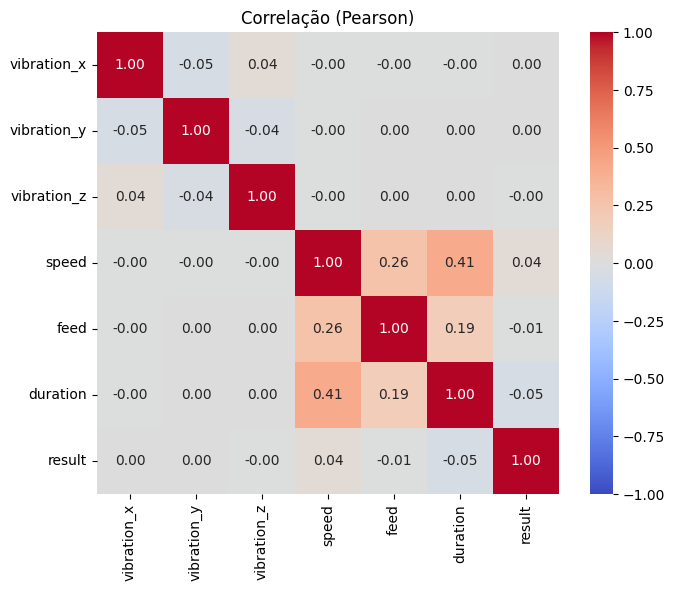

,column,correlation
0,result,100.00
1,speed,3.94
2,vibration_y,0.49
3,vibration_x,0.14
4,vibration_z,-0.09
5,feed,-0.78
6,duration,-5.10


In [10]:
corr_matrix = df_raw[numeric_var].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
)
plt.title('Correlação (Pearson)')
plt.show()
(df_raw.corr(numeric_only=True)['result'] * 100).sort_values(ascending=False).reset_index().rename(columns={'index': 'column', 'result': 'correlation'}) 

Análise de correlação não demonstra nenhuma correlação alta entre variáveis númericas. Mas para um modelo não linear é normal.

# Análise univariada e bivariada
Análise das variáveis categoricas de forma univariada e bivariada em relação a variável target.

## Categorica

### Variavél: Machine

#### Análise univariada

Frequência absoluta:
   machine   count
0     M02  663157
1     M01  560909
2     M03  560165


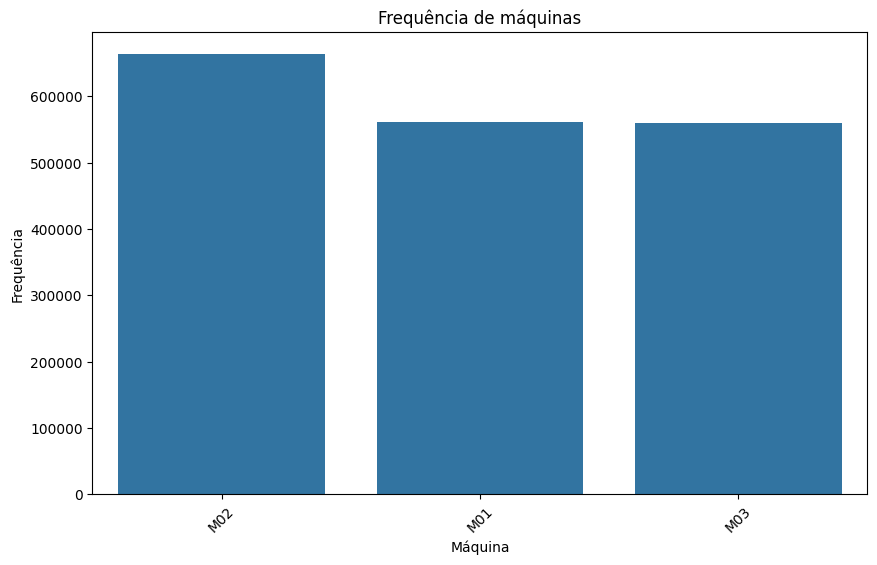

In [11]:
frequency = df_raw['machine'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência de máquinas')
plt.xlabel('Máquina')  
plt.ylabel('Frequência')
plt.xticks(rotation=45)
print("Frequência absoluta:\n", frequency.reset_index())
plt.show()

Frequência relativa:
   machine  proportion
0     M02       37.17
1     M01       31.44
2     M03       31.40


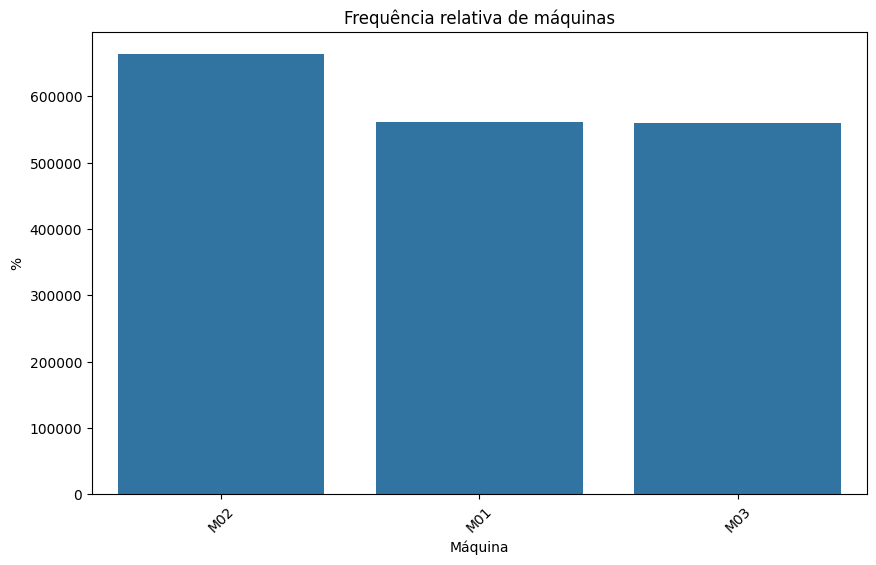

In [12]:
relative_frequency = df_raw['machine'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência relativa de máquinas')
plt.xlabel('Máquina')  
plt.ylabel('%')
plt.xticks(rotation=45)
print("Frequência relativa:\n", relative_frequency.reset_index())
plt.show()

Observa-se o equilibrio entre os dados dividivos por máquina.

#### Análise bivariada

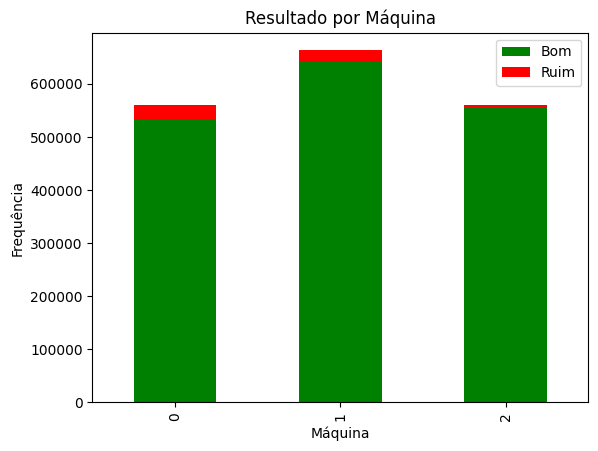

result,machine,good,bad
0,M01,532088,28821
1,M02,642073,21084
2,M03,554421,5744


In [16]:
result_table_values = pd.crosstab(df_raw['machine'], df_raw['result'])

result_table_values = (
    result_table_values
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        # machine vira coluna em vez de índice
)

result_table_values.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por Máquina')
plt.xlabel('Máquina')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_values.head()


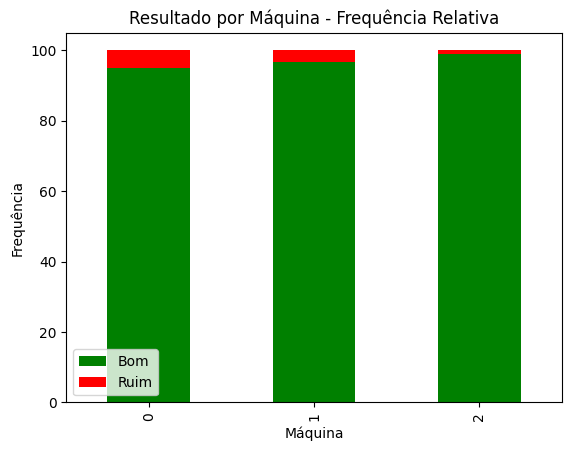

result,machine,good,bad
0,M01,94.86,5.14
1,M02,96.82,3.18
2,M03,98.97,1.03


In [17]:
result_table_frequecy = pd.crosstab(df_raw['machine'], df_raw['result'], normalize='index') * 100

result_table_frequecy = (
    result_table_frequecy
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        # machine vira coluna em vez de índice
)

result_table_frequecy.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por Máquina - Frequência Relativa')
plt.xlabel('Máquina')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()


result_table_frequecy.head()

In [18]:
tabela = pd.crosstab(df_raw['machine'], df_raw['result'])

chi2, p, dof, expected = stats.chi2_contingency(tabela)

n = tabela.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabela.shape) - 1)))

print(f'Qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f"Cramer's V: {cramers_v:.3f}")

Qui-quadrado: 15702.47848302256
Valor p: 0.0
Cramer's V: 0.094


1. É possivel observar que há diferenças entre as % entre os resultados bom e ruim entre as diferentes máquinas;
2. Os testes estátisticos demonstra que há diferenças entre as máquinas mas em especial o valor de Cramer's V mostra uma associação fraca entre máquina ou resultado (a variável sozinha não tem impacto forte).

### Variavél: Operation

#### Análise univariada

Frequência absoluta:
    operation   count
0       OP09  239953
1       OP00  224498
2       OP06  161801
3       OP04  146223
4       OP02  132785
5       OP12  116842
6       OP03  114295
7       OP10  112787
8       OP13   94015
9       OP08   89305
10      OP11   86268
11      OP01   82404
12      OP07   76931
13      OP14   55922
14      OP05   50202


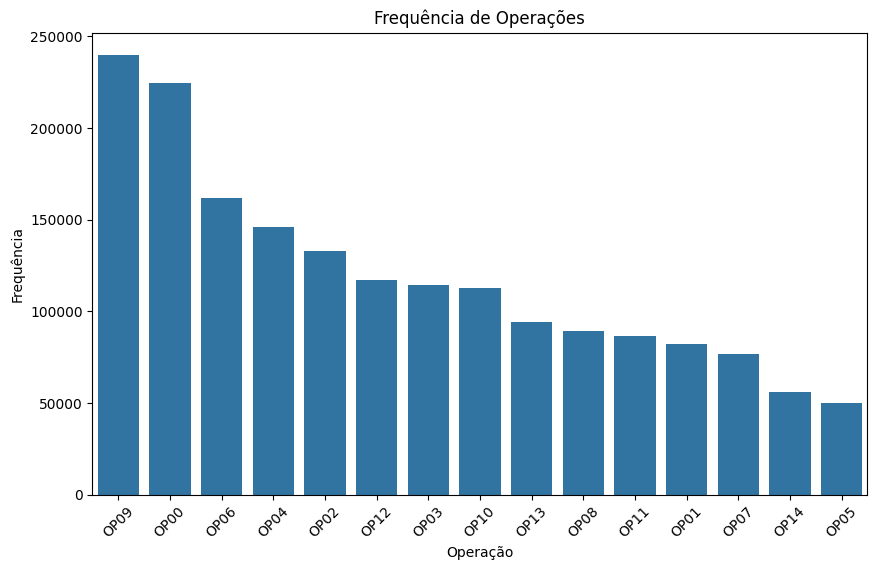

In [19]:
frequency = df_raw['operation'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência de Operações')	
plt.xlabel('Operação')  
plt.ylabel('Frequência')
plt.xticks(rotation=45)
print("Frequência absoluta:\n", frequency.reset_index())
plt.show()

Frequência relativa:
    operation  proportion
0       OP09       13.45
1       OP00       12.58
2       OP06        9.07
3       OP04        8.20
4       OP02        7.44
5       OP12        6.55
6       OP03        6.41
7       OP10        6.32
8       OP13        5.27
9       OP08        5.01
10      OP11        4.84
11      OP01        4.62
12      OP07        4.31
13      OP14        3.13
14      OP05        2.81


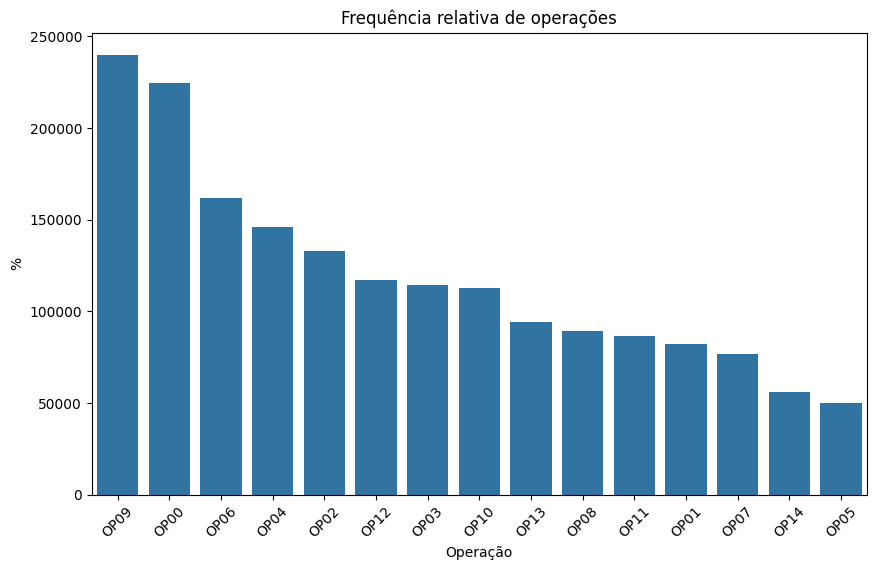

In [20]:
relative_frequency = df_raw['operation'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência relativa de operações')	
plt.xlabel('Operação')  
plt.ylabel('%')
plt.xticks(rotation=45)
print("Frequência relativa:\n", relative_frequency.reset_index())
plt.show()

1. Como há varias operações observa-se que esses valores tem maior variação. 
2. Talvez agrupar processos sejam necessários posteriormente para melhorar a qualidade.

#### Análise bivariada

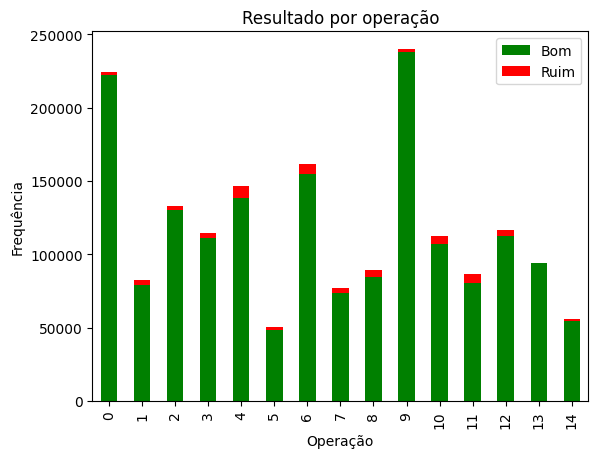

result,operation,good,bad
0,OP00,222119,2379
1,OP01,79372,3032
2,OP02,129957,2828
3,OP03,111413,2882
4,OP04,138265,7958


In [23]:
result_table_values = pd.crosstab(df_raw['operation'], df_raw['result'])

result_table_values = (
    result_table_values
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        # machine vira coluna em vez de índice
)

result_table_values.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por operação')
plt.xlabel('Operação')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_values.head()


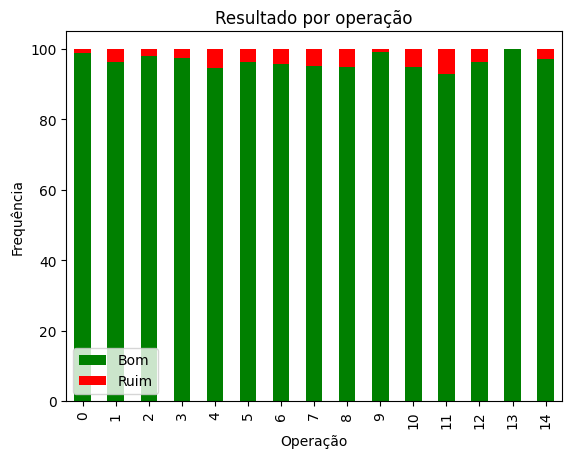

result,operation,good,bad
0,OP00,98.94,1.06
1,OP01,96.32,3.68
2,OP02,97.87,2.13
3,OP03,97.48,2.52
4,OP04,94.56,5.44


In [22]:
result_table_frequecy = pd.crosstab(df_raw['operation'], df_raw['result'], normalize='index') * 100

result_table_frequecy = (
    result_table_frequecy
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        # machine vira coluna em vez de índice
)

result_table_frequecy.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por operação')
plt.xlabel('Operação')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()


result_table_frequecy.head()

In [24]:
tabela = pd.crosstab(df_raw['operation'], df_raw['result'])

chi2, p, dof, expected = stats.chi2_contingency(tabela)

n = tabela.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabela.shape) - 1)))

print(f'Qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f"Cramer's V: {cramers_v:.3f}")

Qui-quadrado: 22467.15419541832
Valor p: 0.0
Cramer's V: 0.112


1. É possivel observar que há diferenças entre as % entre os resultados bom e ruim entre as diferentes operações;
2. Os testes estátisticos demonstra que há diferenças entre as máquinas, o valor de Cramer's V ja demonstra um valor que tem associação moderada mas muito próxima do fraco.

### Variavél: Description

#### Análise univariada

Frequência absoluta:
       description    count
0      Step Drill  1317478
1  Straight Flute   239953
2           Drill   132785
3   T-Slot Cutter    94015


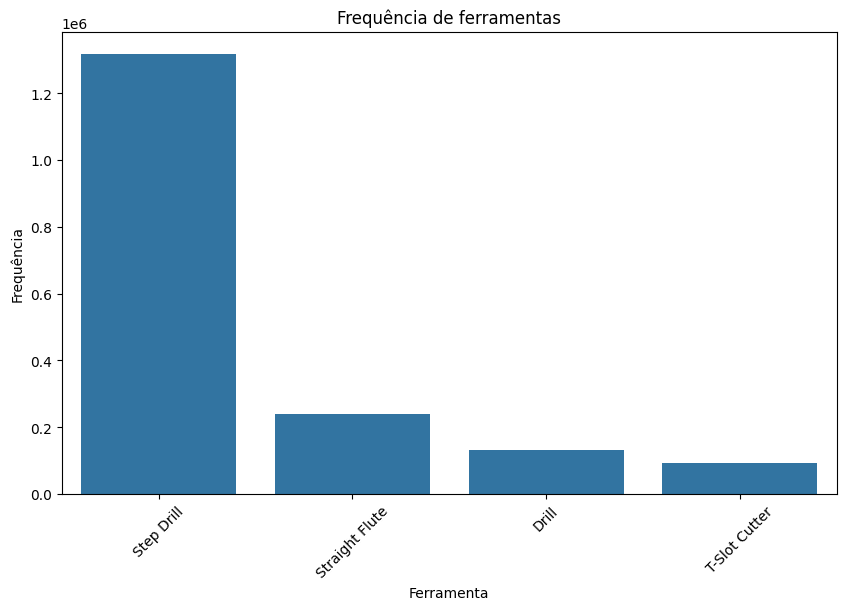

In [25]:
frequency = df_raw['description'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência de ferramentas')
plt.xlabel('Ferramenta')  
plt.ylabel('Frequência')
plt.xticks(rotation=45)
print("Frequência absoluta:\n", frequency.reset_index())
plt.show()

Frequência relativa:
       description  proportion
0      Step Drill       73.84
1  Straight Flute       13.45
2           Drill        7.44
3   T-Slot Cutter        5.27


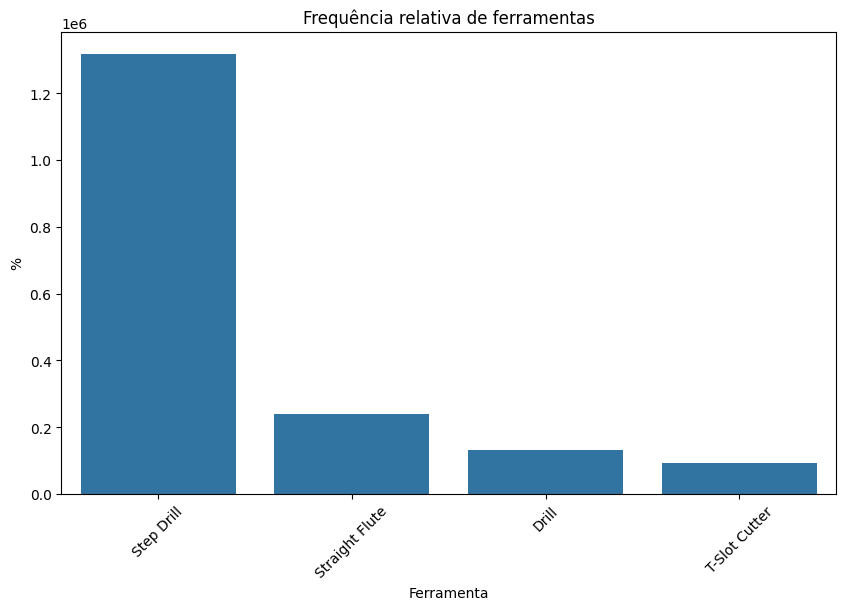

In [ ]:
relative_frequency = df_raw['description'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência relativa de ferramentas')
plt.xlabel('Ferramenta')
plt.ylabel('%')
plt.xticks(rotation=45)
print("Frequência relativa:\n", relative_frequency.reset_index())
plt.show()

1. Observa-se que o processo de step-drill é uma ferramenta com mais utilização no processo;
2. Há possibilidades de um comparativo 1 x demais para melhor performace.

#### Análise bivariada

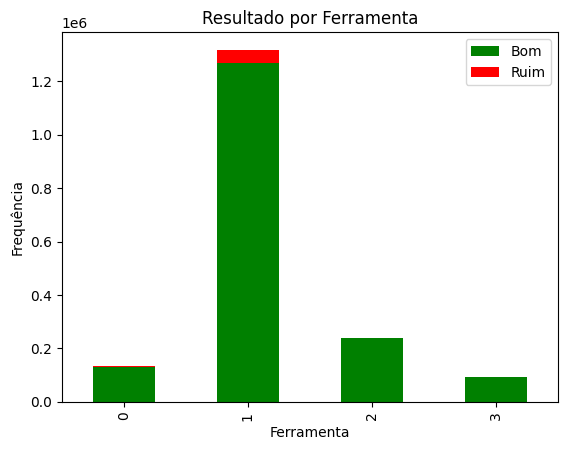

result,description,good,bad
0,Drill,129957,2828
1,Step Drill,1266616,50862
2,Straight Flute,237994,1959
3,T-Slot Cutter,94015,0


In [27]:
result_table_values = pd.crosstab(df_raw['description'], df_raw['result'])

result_table_values = (
    result_table_values
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()       
)

result_table_values.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por Ferramenta')
plt.xlabel('Ferramenta')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_values.head()


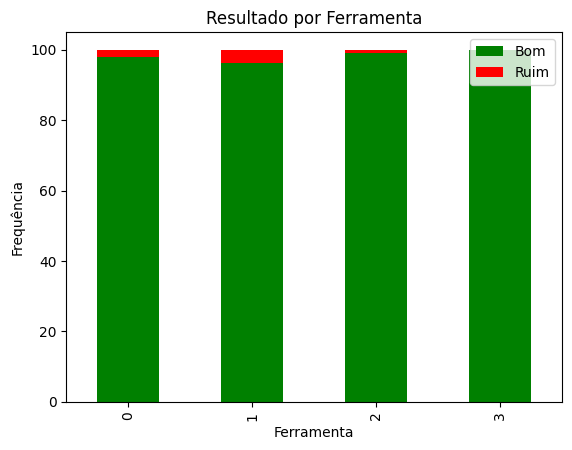

result,description,good,bad
0,Drill,97.87,2.13
1,Step Drill,96.14,3.86
2,Straight Flute,99.18,0.82
3,T-Slot Cutter,100.00,0.00


In [28]:
result_table_frequecy = pd.crosstab(df_raw['description'], df_raw['result'], normalize='index') * 100

result_table_frequecy = (
    result_table_frequecy
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        
)

result_table_frequecy.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por Ferramenta')
plt.xlabel('Ferramenta')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_frequecy.head()

In [29]:
tabela = pd.crosstab(df_raw['description'], df_raw['result'])

chi2, p, dof, expected = stats.chi2_contingency(tabela)

n = tabela.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabela.shape) - 1)))

print(f'Qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f"Cramer's V: {cramers_v:.3f}")

Qui-quadrado: 10064.807765520578
Valor p: 0.0
Cramer's V: 0.075


1. É possivel observar que há diferenças entre as % entre os resultados bom e ruim entre as diferentes ferramentas;
2. Os testes estátisticos demonstra que há diferenças entre as máquinas, o valor de Cramer's V ja demonstra um valor que tem associação fraca.

### Resultado

Frequência absoluta:
    result    count
0       0  1728582
1       1    55649


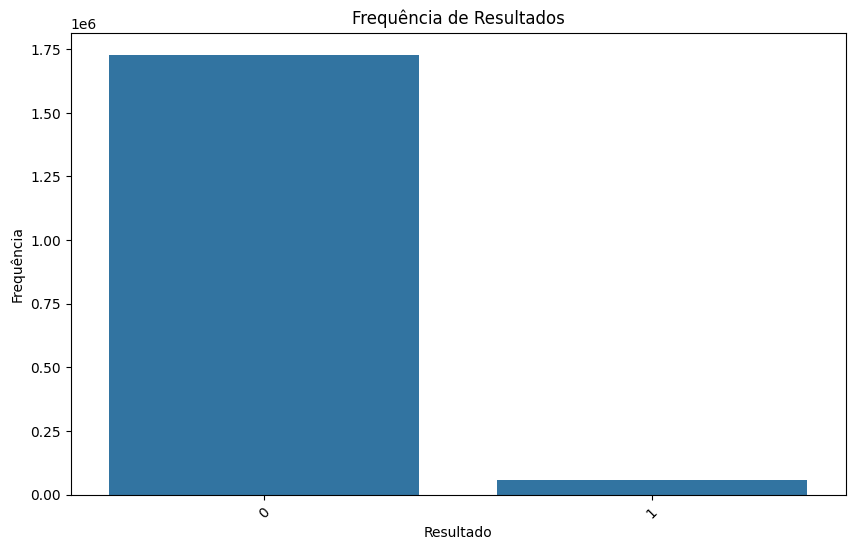

In [30]:
frequency = df_raw['result'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência de Resultados')
plt.xlabel('Resultado')  
plt.ylabel('Frequência')
plt.xticks(rotation=45)
print("Frequência absoluta:\n", frequency.reset_index())
plt.show()

Frequência relativa:
    result  proportion
0       0       96.88
1       1        3.12


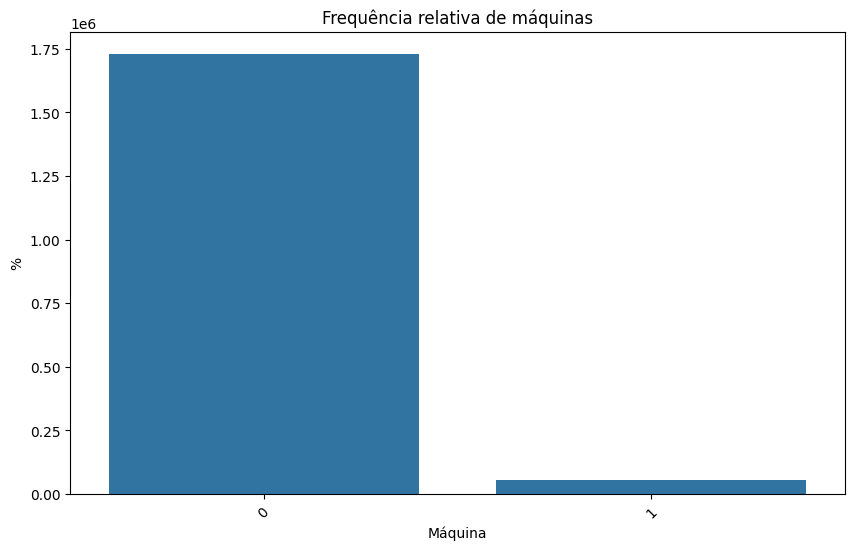

In [34]:
relative_frequency = df_raw['result'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequência relativa de máquinas')
plt.xlabel('Máquina')  
plt.ylabel('%')
plt.xticks(rotation=45)
print("Frequência relativa:\n", relative_frequency.reset_index())
plt.show()


Obsersava-se mais uma vez a diferença entre valores de "Bom" e "Ruim" do dataset.

## Númerica

### Variável: Vibração X

#### Análise bivariada

In [35]:
df_raw.groupby('result')['vibration_x'].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,1728582.00,3.30,397.01,-2000.00,-56.00,5.00,62.00,2000.00
1,55649.00,6.46,407.15,-1992.00,-74.00,7.00,91.00,1957.00


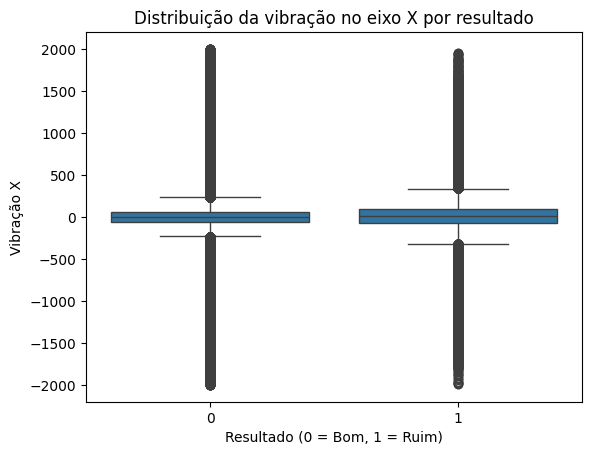

In [37]:
sns.boxplot(x='result', y='vibration_x', data=df_raw)
plt.title('Distribuição da vibração no eixo X por resultado')
plt.xlabel('Resultado (0 = Bom, 1 = Ruim)')
plt.ylabel('Vibração X')
plt.show()

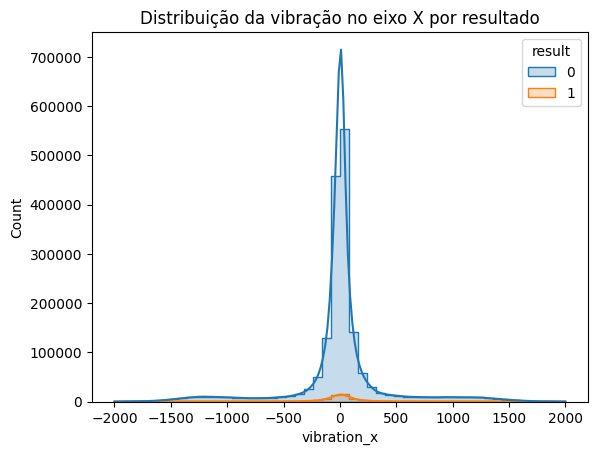

In [38]:
sns.histplot(data=df_raw, x='vibration_x', hue='result', kde=True, bins=50, element='step')
plt.title('Distribuição da vibração no eixo X por resultado')
plt.show()

In [ ]:
grupo_bom = df_raw[df_raw['result'] == 0]['vibration_x']
grupo_ruim = df_raw[df_raw['result'] == 1]['vibration_x']

u_stat, p = stats.mannwhitneyu(grupo_bom, grupo_ruim, alternative='two-sided')

print(f'Mann-Whitney U: U = {u_stat}, p = {p}')

1. Observa-se diferença nas medidas resumos com valores relativamente maiores para o resultado "Ruim"
2. O boxplot tem resultados bem parecidos tanto na distribuição de outliers quanto no tamanho da caixa.
3. Da pra observar a concentração de resultados "bons" é maior que "ruins" no histograma, e também que os resultados "ruins" tem cauda mais espessa nas bordas indicando que vibrações extremas podem causar mais problemas.
4. Os testes estatísticos demonstram que há diferença significativa pela variável.

### Variável: Vibração Y

#### Análise bivariada

In [39]:
df_raw.groupby('result')['vibration_y'].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,1728582.00,17.05,197.19,-1996.00,-72.00,17.00,107.00,1998.00
1,55649.00,22.70,303.05,-1975.00,-142.00,19.00,193.00,1975.00


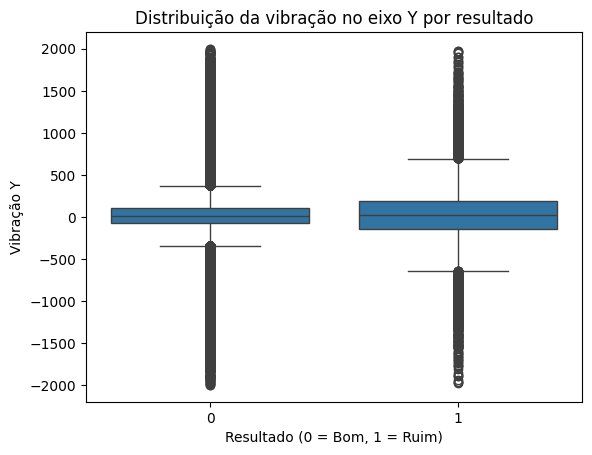

In [40]:
sns.boxplot(x='result', y='vibration_y', data=df_raw)
plt.title('Distribuição da vibração no eixo Y por resultado')
plt.xlabel('Resultado (0 = Bom, 1 = Ruim)')
plt.ylabel('Vibração Y')
plt.show()

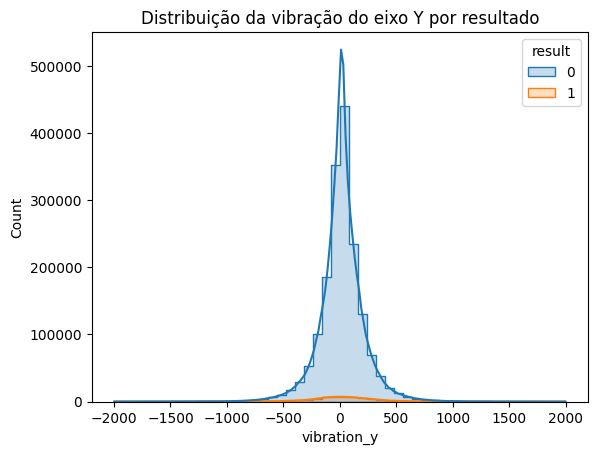

In [41]:
sns.histplot(data=df_raw, x='vibration_y', hue='result', kde=True, bins=50, element='step')
plt.title('Distribuição da vibração do eixo Y por resultado')
plt.show()

In [42]:
grupo_bom = df_raw[df_raw['result'] == 0]['vibration_y']
grupo_ruim = df_raw[df_raw['result'] == 1]['vibration_y']

u_stat, p = stats.mannwhitneyu(grupo_bom, grupo_ruim, alternative='two-sided')

print(f'Mann-Whitney U: U = {u_stat}, p = {p}')

Mann-Whitney U: U = 47488103808.5, p = 3.564974129854539e-07


1. Observa-se diferença nas medidas resumos com valores relativamente maiores para o resultado "Ruim", tendo desvio padrão muito maior.
2. O boxplot mostra que a mediana para resultado "ruim" é maior o que indica que as vibrações no eixo Y aumentam quando há falhas. Outro aspecto é que a caixa do "Ruim" é maior o que indica que há maior variabilidade de vibração em casos de falha. 
3. Da pra observar a concentração de resultados "bons" é maior que "ruins" no histograma, e também que os resultados "ruins" tem cauda mais espessa nas bordas indicando que vibrações extremas podem causar mais problemas.
4. Os testes estatísticos demonstram que há diferença significativa pela variável.

### Variável: Vibração Z

#### Análise bivariada

In [43]:
df_raw.groupby('result')['vibration_z'].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,1728582.00,-1023.91,195.43,-2000.00,-1114.00,-1024.00,-935.00,874.00
1,55649.00,-1025.00,320.92,-2000.00,-1196.00,-1036.00,-862.00,1795.00


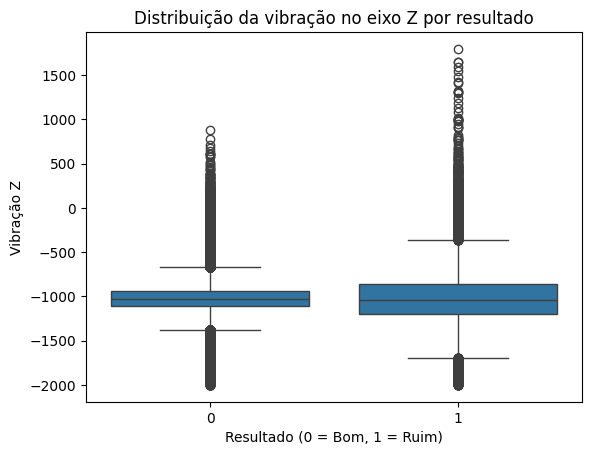

In [45]:
sns.boxplot(x='result', y='vibration_z', data=df_raw)
plt.title('Distribuição da vibração no eixo Z por resultado')
plt.xlabel('Resultado (0 = Bom, 1 = Ruim)')
plt.ylabel('Vibração Z')
plt.show()

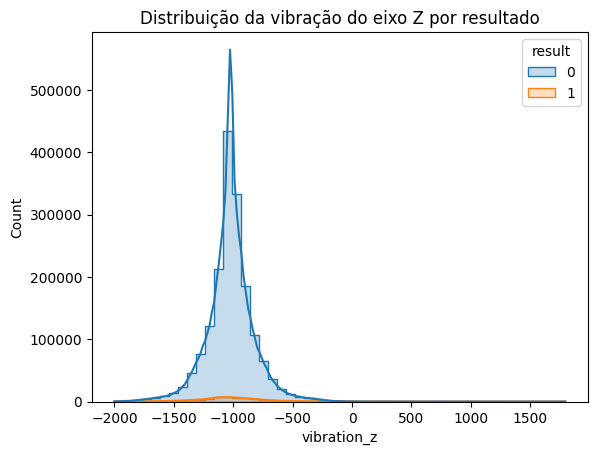

In [46]:
sns.histplot(data=df_raw, x='vibration_z', hue='result', kde=True, element='step', bins=50)
plt.title('Distribuição da vibração do eixo Z por resultado')
plt.show()

In [47]:
grupo_bom = df_raw[df_raw['result'] == 0]['vibration_z']
grupo_ruim = df_raw[df_raw['result'] == 1]['vibration_z']

u_stat, p = stats.mannwhitneyu(grupo_bom, grupo_ruim, alternative='two-sided')

print(f'Mann-Whitney U: U = {u_stat}, p = {p}')

Mann-Whitney U: U = 49443774892.5, p = 2.0223810012286664e-29


1. Observa-se diferença nas medidas resumos com valores relativamente maiores para o resultado "Ruim", tendo desvio padrão muito maior.
2. O boxplot mostra que a mediana para resultado "ruim" é maior o que indica que as vibrações no eixo Y aumentam quando há falhas. Outro aspecto é que a caixa do "Ruim" é maior o que indica que há maior variabilidade de vibração em casos de falha.  Também há mais outliers em valores acima de 500 para resultado "Ruim" o que indica que altas vibrações são uma causa notoria.
3. Da pra observar a concentração de resultados "bons" é maior que "ruins" no histograma, e também que os resultados "ruins" tem cauda mais espessa nas bordas indicando que vibrações extremas podem causar mais problemas. Outro pnto é que a concentração é em torno da vibração -1000hz e não do 0 como os demais eixos.
4. Os testes estatísticos demonstram que há diferença significativa pela variável.

### Variável: Velocidade

#### Análise bivariada

In [49]:
df_raw.groupby('result')['speed'].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,1728582.00,233.20,41.80,75.00,250.00,250.00,250.00,250.00
1,55649.00,242.56,17.80,200.00,250.00,250.00,250.00,250.00


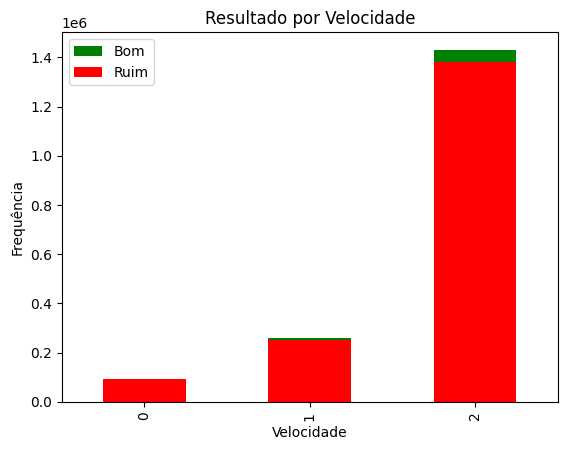

result,speed,good,bad
0,75,94015,0
1,200,251633,8285
2,250,1382934,47364


In [61]:
result_table_values = pd.crosstab(df_raw['speed'], df_raw['result'])

result_table_values = (
    result_table_values
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()       
)

result_table_values.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por Velocidade')
plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_values.head()


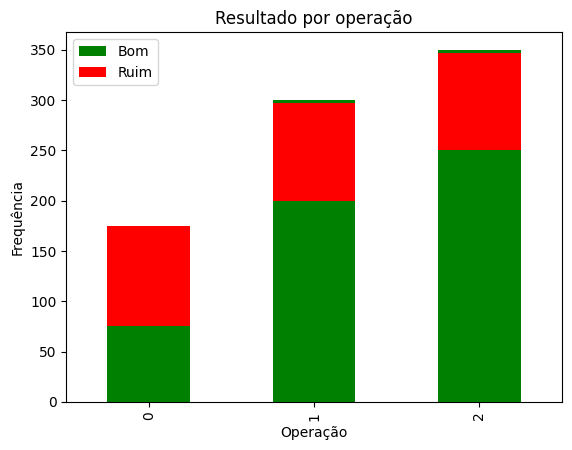

result,speed,good,bad
0,75,100.00,0.00
1,200,96.81,3.19
2,250,96.69,3.31


In [ ]:
result_table_frequecy = pd.crosstab(df_raw['speed'], df_raw['result'], normalize='index') * 100

result_table_frequecy = (
    result_table_frequecy
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        # machine vira coluna em vez de índice
)

result_table_frequecy.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por operação')
plt.xlabel('Operação')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_frequecy.head()

In [63]:
tabela = pd.crosstab(df_raw['speed'], df_raw['result'])

chi2, p, dof, expected = stats.chi2_contingency(tabela)

n = tabela.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabela.shape) - 1)))

print(f'Qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f"Cramer's V: {cramers_v:.3f}")

Qui-quadrado: 3206.199047500905
Valor p: 0.0
Cramer's V: 0.042


1. Observa-se diferença nas medidas resumos com valores de média relativamente maiores para o resultado "Ruim" e desvio maior para o resultado "Bom".
2. Apesar de ser uma variável numérica só existem 3 valores, então foi feita análise como categórica
3. Valores muito proximos o que indica pouca distintação entre velocidades.
4. Os valores estátistico indica alguma diferença mas com associação fraca 

### Variável: Feed

#### Análise bivariada

In [70]:
df_raw.groupby('result')['feed'].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,1728582.00,80.98,69.58,25.00,50.00,50.00,100.00,330.00
1,55649.00,77.87,62.87,50.00,50.00,50.00,100.00,330.00


In [75]:
df_raw['feed' ].value_counts()

feed
50     1066874
100     509047
330     114295
25       94015
Name: count, dtype: int64

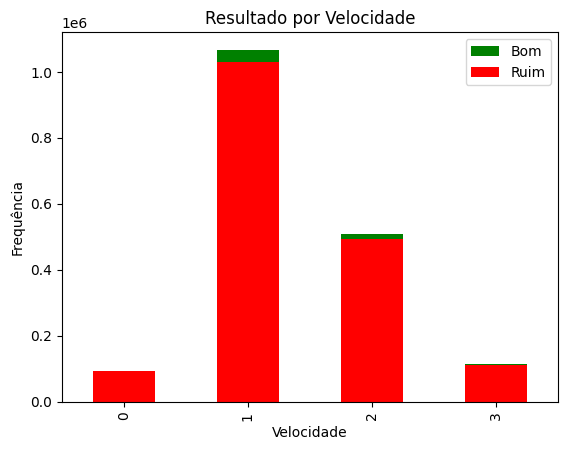

result,feed,good,bad
0,25,94015,0
1,50,1028992,37882
2,100,494162,14885
3,330,111413,2882


In [74]:
result_table_values = pd.crosstab(df_raw['feed'], df_raw['result'])

result_table_values = (
    result_table_values
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()       
)

result_table_values.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por Velocidade')
plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()

result_table_values.head()

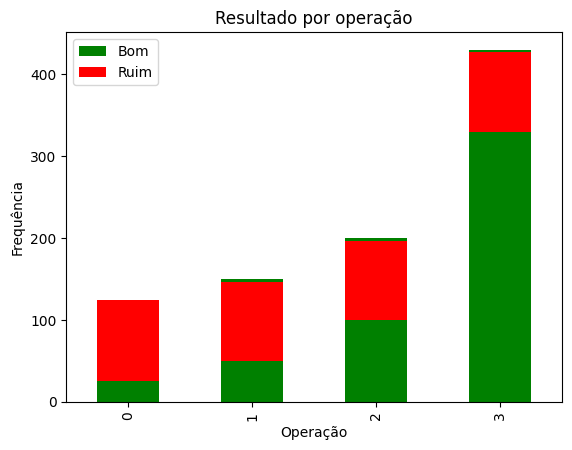

result,feed,good,bad
0,25,100.00,0.00
1,50,96.45,3.55
2,100,97.08,2.92
3,330,97.48,2.52


In [76]:
result_table_frequecy = pd.crosstab(df_raw['feed'], df_raw['result'], normalize='index') * 100

result_table_frequecy = (
    result_table_frequecy
      .rename(columns={0: 'good', 1: 'bad'})
      .reset_index()        # machine vira coluna em vez de índice
)

result_table_frequecy.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Resultado por operação')
plt.xlabel('Operação')
plt.ylabel('Frequência')
plt.legend(['Bom', 'Ruim'])
plt.show()


result_table_frequecy.head()

In [77]:
tabela = pd.crosstab(df_raw['feed'], df_raw['result'])

chi2, p, dof, expected = stats.chi2_contingency(tabela)

n = tabela.values.sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabela.shape) - 1)))

print(f'Qui-quadrado: {chi2}')
print(f'Valor p: {p}')
print(f"Cramer's V: {cramers_v:.3f}")

Qui-quadrado: 3883.963832716307
Valor p: 0.0
Cramer's V: 0.047


1. Observa-se que as medidas resumos tem diferenças com desvio padrão maior para a classe "ruins"
2. O boxplot mostra diferença entre eles sendo resultados "ruins" com cauda mais longa e maior amplitude, indicando que os resultados "ruins" tem mais variação. 
3. Da pra observar a concentração de resultados "bons" é maior que "ruins" no histograma, e também que os resultados "ruins" tem cauda mais espessa nas bordas indicando que vibrações extremas podem causar mais problemas.
4. os testes estátisticos demonstram que há diferença significativa pela variável.

### Variável: Duração

#### Análise bivariada

In [78]:
df_raw.groupby('result')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,1728582.00,68.40,35.13,18.00,37.00,64.00,102.00,132.00
1,55649.00,58.14,26.96,18.00,37.00,59.00,77.00,132.00


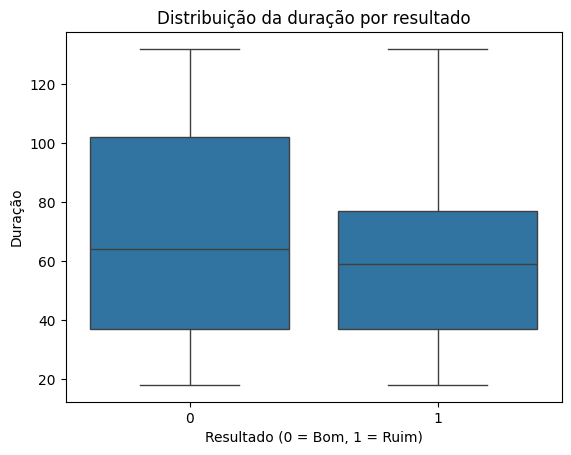

In [81]:
sns.boxplot(x='result', y='duration', data=df_raw)
plt.title('Distribuição da duração por resultado')
plt.xlabel('Resultado (0 = Bom, 1 = Ruim)')
plt.ylabel('Duração')
plt.show()

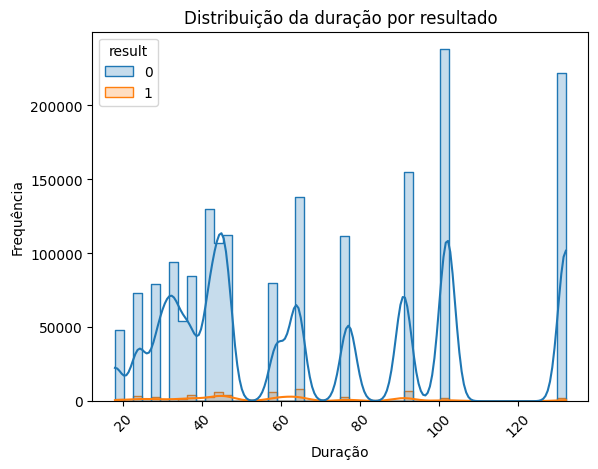

In [85]:
sns.histplot(data=df_raw, x='duration', hue='result', kde=True, element='step', bins=50)
plt.title('Distribuição da duração por resultado')
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [82]:
grupo_bom = df_raw[df_raw['result'] == 0]['duration']
grupo_ruim = df_raw[df_raw['result'] == 1]['duration']

u_stat, p = stats.mannwhitneyu(grupo_bom, grupo_ruim, alternative='two-sided')

print(f'Mann-Whitney U: U = {u_stat}, p = {p}')

Mann-Whitney U: U = 54710011816.5, p = 0.0


1. Observa-se que as medidas resumos tem diferenças com desvio padrão maior para a classe "ruins"
2. O boxplot mostra diferença entre eles sendo resultados "ruins" com cauda mais longa e maior amplitude, indicando que os resultados "ruins" tem mais variação. 
3. Da pra observar a concentração de resultados "bons" é maior que "ruins" no histograma, e também que os resultados "ruins" tem cauda mais espessa nas bordas indicando que vibrações extremas podem causar mais problemas.
4. os testes estátisticos demonstram que há diferença significativa pela variável.

In [86]:
df_raw.to_csv('../data/processed/sample_df_processed.csv', index=False)